<a href="https://colab.research.google.com/github/MassiveTortoise/DataScience-AI-FinalProject/blob/main/FinalAmigos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="s-nlp/roberta_toxicity_classifier")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at s-nlp/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
sequence_to_classify = 'The BC "Fiberals" are desparate to get the pork barrel back. Shameless!'
pipe(sequence_to_classify)

[{'label': 'toxic', 'score': 0.9493330717086792}]

In [ ]:
import pandas as pd
splits = {'train': 'train.jsonl', 'test': 'test.jsonl'}
df = pd.read_json("hf://datasets/SetFit/toxic_conversations_50k/" + splits["train"], lines=True)

In [ ]:
df

,text,label,label_text
0,theres not enough going on around here for air...,0,not toxic
1,How about ZERO,0,not toxic
2,Her name is still floating? Might I suggest f...,0,not toxic
3,Stop by So Cold at MFNW/Project Pabst! It'll m...,0,not toxic
4,"Nobody awake on the bridge, no lookouts ,,no r...",0,not toxic
...,...,...,...
49995,Offensive is in the eye of the beholder. If on...,0,not toxic
49996,I have been a party to many hiring meetings a...,0,not toxic
49997,"Sorry, Venezuelan's got themselves into this m...",1,toxic
49998,It appears you'd feel more comfortable in a mo...,0,not toxic


In [ ]:
df.columns

Index(['text', 'label', 'label_text'], dtype='object')

In [ ]:
df.shape

(50000, 3)

In [ ]:
df['label_text'].value_counts()

,count
label_text,
not toxic,46035
toxic,3965


In [ ]:
df.head(10)

,text,label,label_text
0,theres not enough going on around here for air...,0,not toxic
1,How about ZERO,0,not toxic
2,Her name is still floating? Might I suggest f...,0,not toxic
3,Stop by So Cold at MFNW/Project Pabst! It'll m...,0,not toxic
4,"Nobody awake on the bridge, no lookouts ,,no r...",0,not toxic
5,Pessimist's might say that we the US will have...,0,not toxic
6,I'm sure Hawaiian can put Southwest out of bus...,0,not toxic
7,"States don't grow economies, cities grow econo...",0,not toxic
8,What makes Magnitsky so special? Countless tho...,0,not toxic
9,"The Mayor said we need ""more skin in the game""...",0,not toxic


In [ ]:
df.head(5000)['label_text'].value_counts()

,count
label_text,
not toxic,4583
toxic,417


In [ ]:
df_5000 = df.head(5000)

In [ ]:
df_5000

,text,label,label_text
0,theres not enough going on around here for air...,0,not toxic
1,How about ZERO,0,not toxic
2,Her name is still floating? Might I suggest f...,0,not toxic
3,Stop by So Cold at MFNW/Project Pabst! It'll m...,0,not toxic
4,"Nobody awake on the bridge, no lookouts ,,no r...",0,not toxic
...,...,...,...
4995,"I would bet that the judge has insurance, in w...",0,not toxic
4996,"""the end game for him is to undo everything Ob...",0,not toxic
4997,"Like the Ayatollah Khomenei, he's ""gone where ...",0,not toxic
4998,This should be the headline:\n\nThe Neighborho...,0,not toxic


In [ ]:
df_5000 = df_5000.reset_index(drop=True)

In [ ]:
df_5000['text'] = df_5000['text'].str.lower()

In [ ]:
df_5000['text'] = df_5000['text'].str.replace('[^\w\s]','')

In [ ]:
# Remove stop words: Eliminate common words (like "is", "the", "and") that don't contribute much meaning.
df_5000['text'] = df_5000['text'].str.replace(' is ', ' ')
df_5000['text'] = df_5000['text'].str.replace(' the ', ' ')
df_5000['text'] = df_5000['text'].str.replace(' and ', ' ')

In [ ]:
# Remove special characters and numbers: Clean up punctuation, emojis, and digits if they don't affect sentiment.
def remove_special_characters(text):
    import re
    return re.sub(r'[^a-zA-Z\s]', '', text)

df_5000['text'] = df_5000['text'].apply(remove_special_characters)

def remove_emojis(text):
    import re
    return re.sub(r'[^\x00-\x7F]+', '', text)

df_5000['text'] = df_5000['text'].apply(remove_emojis)

def remove_numbers(text):
    import re
    return re.sub(r'\d+', '', text)

df_5000['text'] = df_5000['text'].apply(remove_numbers)

# see the first 10 rows

In [ ]:
df_5000.head(10)

,text,label,label_text
0,theres not enough going on around here for air...,0,not toxic
1,how about zero,0,not toxic
2,her name still floating might i suggest flush...,0,not toxic
3,stop by so cold at mfnwproject pabst itll make...,0,not toxic
4,nobody awake on bridge no lookouts no radar te...,0,not toxic
5,pessimists might say that we us will have a go...,0,not toxic
6,im sure hawaiian can put southwest out of busi...,0,not toxic
7,states dont grow economies cities grow economy...,0,not toxic
8,what makes magnitsky so special countless thou...,0,not toxic
9,the mayor said we need more skin in game that...,0,not toxic


# perform the toxic classifier model on the dataset

In [ ]:
#turn it into a list
result = pipe(df_5000['text'].tolist())

In [ ]:
result

[{'label': 'neutral', 'score': 0.9999489784240723},
 {'label': 'neutral', 'score': 0.9999027252197266},
 {'label': 'neutral', 'score': 0.9998712539672852},
 {'label': 'neutral', 'score': 0.9994361996650696},
 {'label': 'neutral', 'score': 0.9999505281448364},
 {'label': 'neutral', 'score': 0.9993759989738464},
 {'label': 'neutral', 'score': 0.9999643564224243},
 {'label': 'neutral', 'score': 0.9998916387557983},
 {'label': 'neutral', 'score': 0.9999550580978394},
 {'label': 'neutral', 'score': 0.9998138546943665},
 {'label': 'neutral', 'score': 0.9999642372131348},
 {'label': 'neutral', 'score': 0.9948996901512146},
 {'label': 'neutral', 'score': 0.9997825026512146},
 {'label': 'neutral', 'score': 0.9991825222969055},
 {'label': 'neutral', 'score': 0.957952082157135},
 {'label': 'neutral', 'score': 0.9999587535858154},
 {'label': 'neutral', 'score': 0.9998555183410645},
 {'label': 'neutral', 'score': 0.9970824122428894},
 {'label': 'neutral', 'score': 0.9999492168426514},
 {'label': 'n

In [ ]:
# Assuming 'result' is your list of dictionaries
import pandas as pd

data = []
for entry in result:
    # Check if 'score' is iterable
    if isinstance(entry['score'], (list, tuple)):
        # Find the label with score > 0.5
        label = None
        score = None
        for l, s in zip(entry['label'], entry['score']):
            if s > 0.5:
                label = l
                score = s
                break  # Stop after finding the first label with score > 0.5

        # Append to data list
        data.append({
            'label': label,
            'score': score
        })
    else:  # Handle cases where 'score' is a single float
        label = entry['label']
        score = entry['score'] if entry['score'] > 0.5 else None  # Assign score if > 0.5, else None
        data.append({
            'label': label,
            'score': score
        })

# Convert to DataFrame
predicteddata = pd.DataFrame(data)

predicteddata['text'] = df_5000['text']

predicteddata


,label,score,text
0,neutral,0.999949,theres not enough going on around here for air...
1,neutral,0.999903,how about zero
2,neutral,0.999871,her name still floating might i suggest flush...
3,neutral,0.999436,stop by so cold at mfnwproject pabst itll make...
4,neutral,0.999951,nobody awake on bridge no lookouts no radar te...
...,...,...,...
4995,neutral,0.999645,i would bet that judge has insurance in witch ...
4996,neutral,0.999793,the end game for him to undo everything obama ...
4997,neutral,0.982541,like ayatollah khomenei hes gone where goblins...
4998,neutral,0.999964,this should be headline\n\nthe neighborhood bo...


In [ ]:
dataset = pd.DataFrame()
dataset['true_label'] = df_5000['label_text']
dataset['label'] = predicteddata['label']
dataset['score'] = predicteddata['score']
dataset

,true_label,label,score
0,not toxic,neutral,0.999949
1,not toxic,neutral,0.999903
2,not toxic,neutral,0.999871
3,not toxic,neutral,0.999436
4,not toxic,neutral,0.999951
...,...,...,...
4995,not toxic,neutral,0.999645
4996,not toxic,neutral,0.999793
4997,not toxic,neutral,0.982541
4998,not toxic,neutral,0.999964


In [ ]:
# Replace labels with binary values using lambda functions
true_labels = dataset['true_label'].apply(lambda x: 0 if x == 'not toxic' else 1)
predicted_labels = dataset['label'].apply(lambda x: 0 if x == 'neutral' else 1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy true_labels, predicted_labels
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy:", accuracy*100,'%')

Accuracy: 94.84 %


In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4449  134]
 [ 124  293]]


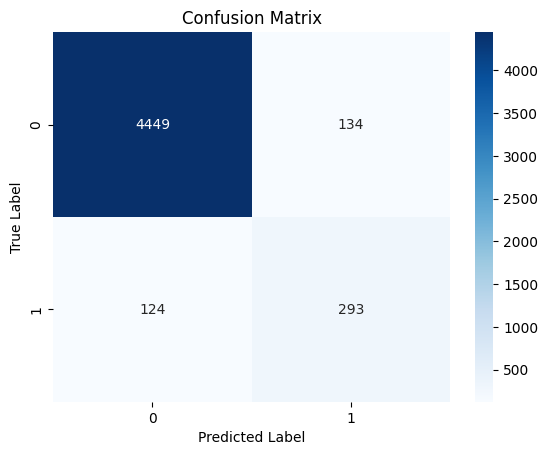

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using seaborn heatmap

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
TN, FP, FN, TP = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

In [ ]:
y_true = [0] * (TN + FP) + [1] * (FN + TP)  # Ground truth
y_pred = [0] * TN + [1] * FP + [0] * FN + [1] * TP  # Predictions

In [ ]:
accuracy_sklearn = accuracy_score(y_true, y_pred)
precision_sklearn = precision_score(y_true, y_pred)
recall_sklearn = recall_score(y_true, y_pred)
f1_sklearn = f1_score(y_true, y_pred)

In [ ]:
print("\nUsing scikit-learn:")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
print(f"F1-Score: {f1_sklearn:.4f}")


Using scikit-learn:
Accuracy: 0.9484
Precision: 0.6862
Recall: 0.7026
F1-Score: 0.6943


In [ ]:
pip install transformers datasets accelerate


In [ ]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("SetFit/toxic_conversations_50k", split="train")

# Use a subset of the first 5000 instances
subset = dataset.select(range(5000))

# Split into train and validation sets (80-20 split)
split = subset.train_test_split(test_size=0.2, seed=42)
train_data = split["train"]
val_data = split["test"]


README.md:   0%|          | 0.00/572 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


train.jsonl:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("s-nlp/roberta_toxicity_classifier")

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

train_data = train_data.map(tokenize_function, batched=True)
val_data = val_data.map(tokenize_function, batched=True)


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("s-nlp/roberta_toxicity_classifier", num_labels=2)


Some weights of the model checkpoint at s-nlp/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    tokenizer=tokenizer,
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-35-22561e74bfb8>:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,0.128100,0.164406
2,0.131500,0.205194
3,0.048600,0.288098


TrainOutput(global_step=750, training_loss=0.11014940401911735, metrics={'train_runtime': 20261.326, 'train_samples_per_second': 0.592, 'train_steps_per_second': 0.037, 'total_flos': 789333166080000.0, 'train_loss': 0.11014940401911735, 'epoch': 3.0})

In [ ]:
model.save_pretrained("./fine_tuned_toxicity_model")
tokenizer.save_pretrained("./fine_tuned_toxicity_model")


('./fine_tuned_toxicity_model/tokenizer_config.json',
 './fine_tuned_toxicity_model/special_tokens_map.json',
 './fine_tuned_toxicity_model/vocab.json',
 './fine_tuned_toxicity_model/merges.txt',
 './fine_tuned_toxicity_model/added_tokens.json',
 './fine_tuned_toxicity_model/tokenizer.json')

In [ ]:
results = trainer.evaluate()
print(results)


{'eval_loss': 0.2880977988243103, 'eval_runtime': 440.093, 'eval_samples_per_second': 2.272, 'eval_steps_per_second': 0.143, 'epoch': 3.0}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the validation set
predictions = trainer.predict(val_data)

# Extract predicted labels
predicted_labels = predictions.predictions.argmax(axis=1)
true_labels = val_data["label"]

# Compute metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.9470
Precision: 0.6892
Recall: 0.6296
F1-Score: 0.6581


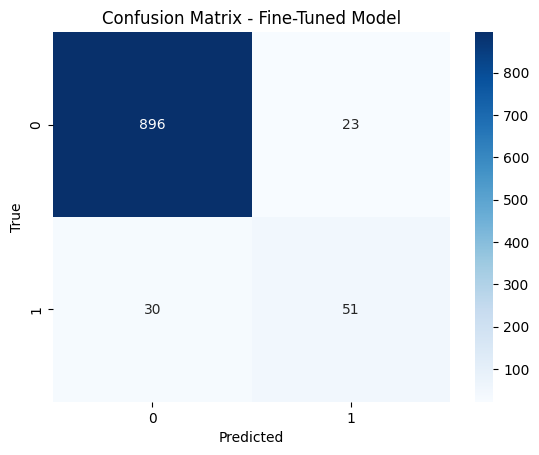

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Fine-Tuned Model")
plt.show()


In [ ]:
accuracy_sklearn
precision_sklearn
recall_sklearn
f1_sklearn

0.6943127962085308

In [ ]:
# Print comparison table
print(f"{'Metric':<15}{'Pre-trained Model':<20}{'Fine-tuned Model'}")
print("-" * 50)
print(f"Accuracy      {accuracy_sklearn :<20}{accuracy}")
print(f"Precision     {precision_sklearn:<20}{precision}")
print(f"Recall        {recall_sklearn:<20}{recall}")
print(f"F1-Score      {f1_sklearn:<20}{f1}")

Metric         Pre-trained Model   Fine-tuned Model
--------------------------------------------------
Accuracy      0.9484              0.947
Precision     0.6861826697892272  0.6891891891891891
Recall        0.7026378896882494  0.6296296296296297
F1-Score      0.6943127962085308  0.6580645161290323


In [ ]:
# Use the fine-tuned model to make predictions
fine_tuned_pipe = pipeline("text-classification", model="./fine_tuned_toxicity_model", tokenizer="./fine_tuned_toxicity_model")
sample_text = "lets fucking have em."
result = fine_tuned_pipe(sample_text)
print(result)


[{'label': 'toxic', 'score': 0.9994572997093201}]
